<a href="https://colab.research.google.com/github/jpupkies/Jim-Pupkies/blob/master/Gemini_Stock_Portfolio_Analysis_%26_Recommendation_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gemini Stock Portfolio Analysis & Recommendation Pipeline

## Overview
This notebook demonstrates a **multi-step reasoning pipeline** applied to a personal stock portfolio using the Google Gemini API.  
It combines your current positions, recent market data, and news sentiment to generate **structured insights, risk assessments, and actionable recommendations**.

The notebook emphasizes **production-minded design**, including deterministic prompt construction, conditional logic, quota-safe simulation mode, and structured outputs with pandas.

---

## Goals
- Load and structure your **stock positions** into a DataFrame
- Pull **recent market data and news** for each position
- Apply **multi-step reasoning** to generate:
  - Portfolio health metrics
  - Risk alerts
  - Conditional recommendations (hold, buy, sell, hedge)
- Produce **actionable insights in a structured format** suitable for dashboards or reporting

---

## Skills Demonstrated
- Conditional reasoning with Gemini for financial decision-making
- Integration of portfolio data with external market and news inputs
- Rule-based validation and structured output generation
- Safe, reproducible LLM execution patterns
- Clear workflow documentation and portfolio-ready outputs

---

## Features
- Quota-safe simulation mode for testing without live API calls
- Optional live Gemini API execution
- Inline visualizations and screenshots for step-by-step clarity
- Structured outputs suitable for portfolio analysis or dashboards

---

## Why This Notebook
This notebook moves from abstract multi-step reasoning to **real-world financial applications**, demonstrating how LLMs can help analyze a personal stock portfolio and provide actionable recommendations.

In [2]:
# --------------------------------------------------
# Step 1: Load Stock Positions with Company Names
# --------------------------------------------------

import pandas as pd

# Define your stock positions with company names
positions_data = [
    {"ticker": "WBD", "name": "Warner Bros Discovery", "shares": 31, "cost_basis": 28.75, "current_price": 30.38, "unrealized_gain": 509.54, "market_value": 891.25},
    {"ticker": "COHR", "name": "Coherent Corp", "shares": 3, "cost_basis": 190.98, "current_price": 206.43, "unrealized_gain": 280.05, "market_value": 572.94},
    {"ticker": "VSCO", "name": "Victoria's Secret & Co", "shares": 5, "cost_basis": 55.28, "current_price": 48.18, "unrealized_gain": 119.20, "market_value": 276.40},
    {"ticker": "PHAT", "name": "Phathom Pharmaceuticals", "shares": 10, "cost_basis": 17.87, "current_price": 21.27, "unrealized_gain": 76.54, "market_value": 178.70},
    {"ticker": "APGE", "name": "Apogee Therapeutics", "shares": 3, "cost_basis": 78.00, "current_price": 76.38, "unrealized_gain": 31.77, "market_value": 234.00},
    {"ticker": "WDC", "name": "Western Digital Corp", "shares": 11, "cost_basis": 176.76, "current_price": 129.24, "unrealized_gain": 242.07, "market_value": 1_944.36},
    {"ticker": "VICR", "name": "Vicor Corp", "shares": 3, "cost_basis": 111.02, "current_price": 130.88, "unrealized_gain": 38.73, "market_value": 333.06},
    {"ticker": "ANRO", "name": "Alto Neuroscience Inc", "shares": 17, "cost_basis": 20.04, "current_price": 21.06, "unrealized_gain": 36.04, "market_value": 340.68},
    {"ticker": "LLY", "name": "Eli Lilly and Co", "shares": 1, "cost_basis": 1_076.48, "current_price": 1_081.52, "unrealized_gain": 109.93, "market_value": 1_076.48},
    {"ticker": "ANAB", "name": "AnaptysBio Inc", "shares": 4, "cost_basis": 50.33, "current_price": 55.33, "unrealized_gain": 19.92, "market_value": 201.32},
    {"ticker": "THR", "name": "Thermon Group Holdings Inc", "shares": 5, "cost_basis": 38.43, "current_price": 37.53, "unrealized_gain": 12.70, "market_value": 192.15},
    {"ticker": "CSCO", "name": "Cisco Systems Inc", "shares": 18, "cost_basis": 78.11, "current_price": 72.53, "unrealized_gain": 76.58, "market_value": 1_405.98},
    {"ticker": "NRC", "name": "National Resh Corp", "shares": 60, "cost_basis": 18.88, "current_price": 19.06, "unrealized_gain": 5.40, "market_value": 1_132.80},
    {"ticker": "COLL", "name": "Collegium Pharmaceutical", "shares": 15, "cost_basis": 48.84, "current_price": 48.24, "unrealized_gain": 0.90, "market_value": 732.60},
    {"ticker": "MRSN", "name": "Mersana Therapeutics Inc", "shares": 50, "cost_basis": 28.92, "current_price": 27.92, "unrealized_gain": -5.50, "market_value": 1_446.00},
    {"ticker": "HAE", "name": "Haemonetics Corp", "shares": 3, "cost_basis": 80.34, "current_price": 80.00, "unrealized_gain": 0.0, "market_value": 241.02},
]

# Create pandas DataFrame
portfolio_df = pd.DataFrame(positions_data)

# Calculate % of portfolio dynamically
total_value = portfolio_df["market_value"].sum()
portfolio_df["% of portfolio"] = (portfolio_df["market_value"] / total_value * 100).round(2)

# Display portfolio
portfolio_df

,ticker,name,shares,cost_basis,current_price,unrealized_gain,market_value,% of portfolio
0,WBD,Warner Bros Discovery,31,28.75,30.38,509.54,891.25,7.96
1,COHR,Coherent Corp,3,190.98,206.43,280.05,572.94,5.12
2,VSCO,Victoria's Secret & Co,5,55.28,48.18,119.20,276.40,2.47
3,PHAT,Phathom Pharmaceuticals,10,17.87,21.27,76.54,178.70,1.60
4,APGE,Apogee Therapeutics,3,78.00,76.38,31.77,234.00,2.09
5,WDC,Western Digital Corp,11,176.76,129.24,242.07,1944.36,17.36
6,VICR,Vicor Corp,3,111.02,130.88,38.73,333.06,2.97
7,ANRO,Alto Neuroscience Inc,17,20.04,21.06,36.04,340.68,3.04
8,LLY,Eli Lilly and Co,1,1076.48,1081.52,109.93,1076.48,9.61
9,ANAB,AnaptysBio Inc,4,50.33,55.33,19.92,201.32,1.80


✅ **What this gives us**

- A **structured DataFrame** of all positions with key metrics:

1. Ticker, shares, cost basis, current price

2. Unrealized gain, market value, weight

<br>

- Ready to feed into **Gemini reasoning pipelines** for:

1. Portfolio health assessment

2. Conditional buy/hold/sell recommendations

3. Risk alerts based on recent performance

# Step 2: Fetch Market Data & Recent News (Simulation Mode)

In [3]:
# --------------------------------------------------
# Step 2: Fetch Market Data & Recent News (Simulation Mode)
# --------------------------------------------------

import pandas as pd

# Simulation mode toggle
SIMULATION_MODE = True

# Placeholder data for recent price change and news sentiment
# In a real scenario, you would replace this with live API calls
market_news_data = [
    {"ticker": "WBD", "price_change_24h": 3.53, "news_sentiment": "Positive", "news_summary": "Strong viewership growth and positive analyst ratings."},
    {"ticker": "COHR", "price_change_24h": 2.77, "news_sentiment": "Positive", "news_summary": "New contract wins expected to boost revenue."},
    {"ticker": "VSCO", "price_change_24h": -2.50, "news_sentiment": "Negative", "news_summary": "Sales figures below expectations in Q4."},
    {"ticker": "PHAT", "price_change_24h": 1.94, "news_sentiment": "Positive", "news_summary": "Promising clinical trial results reported."},
    {"ticker": "APGE", "price_change_24h": -0.69, "news_sentiment": "Neutral", "news_summary": "No major news, stable development."},
    {"ticker": "WDC", "price_change_24h": -2.39, "news_sentiment": "Negative", "news_summary": "Supply chain constraints impact production."},
    {"ticker": "VICR", "price_change_24h": 6.34, "news_sentiment": "Positive", "news_summary": "New government contracts announced."},
    {"ticker": "ANRO", "price_change_24h": 0.30, "news_sentiment": "Neutral", "news_summary": "Routine updates, no major events."},
    {"ticker": "LLY", "price_change_24h": 0.47, "news_sentiment": "Positive", "news_summary": "FDA approval for new drug expected."},
    {"ticker": "ANAB", "price_change_24h": 2.55, "news_sentiment": "Positive", "news_summary": "Successful phase 2 trial outcomes."},
    {"ticker": "THR", "price_change_24h": -0.47, "news_sentiment": "Neutral", "news_summary": "Minor adjustments in production guidance."},
    {"ticker": "CSCO", "price_change_24h": -0.40, "news_sentiment": "Neutral", "news_summary": "Network hardware demand remains stable."},
    {"ticker": "NRC", "price_change_24h": 0.96, "news_sentiment": "Neutral", "news_summary": "Steady revenue reports, no major headlines."},
    {"ticker": "COLL", "price_change_24h": -0.08, "news_sentiment": "Neutral", "news_summary": "Routine financial updates released."},
    {"ticker": "MRSN", "price_change_24h": -0.07, "news_sentiment": "Negative", "news_summary": "Tender offer conditions create uncertainty."},
    {"ticker": "HAE", "price_change_24h": 0.00, "news_sentiment": "Neutral", "news_summary": "No recent news impacting stock."},
]

# Create DataFrame
market_news_df = pd.DataFrame(market_news_data)

# Merge with portfolio to have full view
portfolio_analysis_df = portfolio_df.merge(market_news_df, on="ticker", how="left")

# Display combined portfolio with market data and news
portfolio_analysis_df


,ticker,name,shares,cost_basis,current_price,unrealized_gain,market_value,% of portfolio,price_change_24h,news_sentiment,news_summary
0,WBD,Warner Bros Discovery,31,28.75,30.38,509.54,891.25,7.96,3.53,Positive,Strong viewership growth and positive analyst ...
1,COHR,Coherent Corp,3,190.98,206.43,280.05,572.94,5.12,2.77,Positive,New contract wins expected to boost revenue.
2,VSCO,Victoria's Secret & Co,5,55.28,48.18,119.20,276.40,2.47,-2.50,Negative,Sales figures below expectations in Q4.
3,PHAT,Phathom Pharmaceuticals,10,17.87,21.27,76.54,178.70,1.60,1.94,Positive,Promising clinical trial results reported.
4,APGE,Apogee Therapeutics,3,78.00,76.38,31.77,234.00,2.09,-0.69,Neutral,"No major news, stable development."
5,WDC,Western Digital Corp,11,176.76,129.24,242.07,1944.36,17.36,-2.39,Negative,Supply chain constraints impact production.
6,VICR,Vicor Corp,3,111.02,130.88,38.73,333.06,2.97,6.34,Positive,New government contracts announced.
7,ANRO,Alto Neuroscience Inc,17,20.04,21.06,36.04,340.68,3.04,0.30,Neutral,"Routine updates, no major events."
8,LLY,Eli Lilly and Co,1,1076.48,1081.52,109.93,1076.48,9.61,0.47,Positive,FDA approval for new drug expected.
9,ANAB,AnaptysBio Inc,4,50.33,55.33,19.92,201.32,1.80,2.55,Positive,Successful phase 2 trial outcomes.


✅ **What Step 2 Achieves**

1. Adds **recent price change** and **news sentiment** per stock.

2. Provides a **simulation-ready DataFrame** for multi-step reasoning.

3. Prepares the data for **Gemini-driven portfolio insights**, like:

- Buy/hold/sell recommendations

- Risk alerts

- Conditional actions based on news sentiment and portfolio weight

# Step 3: Generate Conditional Recommendations

In [4]:
# --------------------------------------------------
# Step 3: Generate Conditional Recommendations
# --------------------------------------------------

from random import choice

# Simulation mode toggle
SIMULATION_MODE = True

def generate_recommendation(row):
    """
    Simple rule-based / simulation function to generate recommendations
    In a real implementation, replace with Gemini API calls with structured prompts
    """
    if SIMULATION_MODE:
        # Simulate recommendation logic
        if row['price_change_24h'] > 2 and row['news_sentiment'] == "Positive":
            return "Buy"
        elif row['price_change_24h'] < -1.5 and row['news_sentiment'] == "Negative":
            return "Sell"
        else:
            return "Hold"
    else:
        # Here you would call Gemini API with structured prompts
        # e.g., gemini_query(prompt_for_stock)
        return "Pending API"

# Apply recommendation function
portfolio_analysis_df['Recommendation'] = portfolio_analysis_df.apply(generate_recommendation, axis=1)

# Display updated portfolio with recommendations
portfolio_analysis_df

,ticker,name,shares,cost_basis,current_price,unrealized_gain,market_value,% of portfolio,price_change_24h,news_sentiment,news_summary,Recommendation
0,WBD,Warner Bros Discovery,31,28.75,30.38,509.54,891.25,7.96,3.53,Positive,Strong viewership growth and positive analyst ...,Buy
1,COHR,Coherent Corp,3,190.98,206.43,280.05,572.94,5.12,2.77,Positive,New contract wins expected to boost revenue.,Buy
2,VSCO,Victoria's Secret & Co,5,55.28,48.18,119.20,276.40,2.47,-2.50,Negative,Sales figures below expectations in Q4.,Sell
3,PHAT,Phathom Pharmaceuticals,10,17.87,21.27,76.54,178.70,1.60,1.94,Positive,Promising clinical trial results reported.,Hold
4,APGE,Apogee Therapeutics,3,78.00,76.38,31.77,234.00,2.09,-0.69,Neutral,"No major news, stable development.",Hold
5,WDC,Western Digital Corp,11,176.76,129.24,242.07,1944.36,17.36,-2.39,Negative,Supply chain constraints impact production.,Sell
6,VICR,Vicor Corp,3,111.02,130.88,38.73,333.06,2.97,6.34,Positive,New government contracts announced.,Buy
7,ANRO,Alto Neuroscience Inc,17,20.04,21.06,36.04,340.68,3.04,0.30,Neutral,"Routine updates, no major events.",Hold
8,LLY,Eli Lilly and Co,1,1076.48,1081.52,109.93,1076.48,9.61,0.47,Positive,FDA approval for new drug expected.,Hold
9,ANAB,AnaptysBio Inc,4,50.33,55.33,19.92,201.32,1.80,2.55,Positive,Successful phase 2 trial outcomes.,Buy


✅ **What Step 3 Achieves**

1. Adds a **Recommendation column** (Buy/Hold/Sell) for each stock.

2. Uses **multi-step reasoning logic** (price + sentiment + optional portfolio weighting).

3. Fully simulation-ready; can be replaced with **live Gemini prompts** for more nuanced insights.

4. Prepares the portfolio for **risk and priority assessment** in the next step.

# Step 4: Apply Risk Scoring & Portfolio Alerts

In [5]:
# --------------------------------------------------
# Step 4: Risk Scoring & Portfolio Alerts
# --------------------------------------------------

def assess_risk(row):
    """
    Assign a risk score and priority level based on:
    - Recent price change
    - News sentiment
    - % of portfolio
    """
    score = 0

    # Price change effect
    if row['price_change_24h'] < -2:
        score += 2
    elif row['price_change_24h'] < 0:
        score += 1

    # News sentiment effect
    if row['news_sentiment'] == "Negative":
        score += 2
    elif row['news_sentiment'] == "Neutral":
        score += 1

    # Portfolio weight effect
    if row['% of portfolio'] > 10:
        score += 2
    elif row['% of portfolio'] > 5:
        score += 1

    # Determine risk level
    if score >= 5:
        risk_level = "High"
    elif score >= 3:
        risk_level = "Medium"
    else:
        risk_level = "Low"

    return pd.Series([score, risk_level])

# Apply risk scoring
portfolio_analysis_df[['Risk Score', 'Risk Level']] = portfolio_analysis_df.apply(assess_risk, axis=1)

# Display portfolio with risk assessment and recommendations
portfolio_analysis_df

,ticker,name,shares,cost_basis,current_price,unrealized_gain,market_value,% of portfolio,price_change_24h,news_sentiment,news_summary,Recommendation,Risk Score,Risk Level
0,WBD,Warner Bros Discovery,31,28.75,30.38,509.54,891.25,7.96,3.53,Positive,Strong viewership growth and positive analyst ...,Buy,1,Low
1,COHR,Coherent Corp,3,190.98,206.43,280.05,572.94,5.12,2.77,Positive,New contract wins expected to boost revenue.,Buy,1,Low
2,VSCO,Victoria's Secret & Co,5,55.28,48.18,119.20,276.40,2.47,-2.50,Negative,Sales figures below expectations in Q4.,Sell,4,Medium
3,PHAT,Phathom Pharmaceuticals,10,17.87,21.27,76.54,178.70,1.60,1.94,Positive,Promising clinical trial results reported.,Hold,0,Low
4,APGE,Apogee Therapeutics,3,78.00,76.38,31.77,234.00,2.09,-0.69,Neutral,"No major news, stable development.",Hold,2,Low
5,WDC,Western Digital Corp,11,176.76,129.24,242.07,1944.36,17.36,-2.39,Negative,Supply chain constraints impact production.,Sell,6,High
6,VICR,Vicor Corp,3,111.02,130.88,38.73,333.06,2.97,6.34,Positive,New government contracts announced.,Buy,0,Low
7,ANRO,Alto Neuroscience Inc,17,20.04,21.06,36.04,340.68,3.04,0.30,Neutral,"Routine updates, no major events.",Hold,1,Low
8,LLY,Eli Lilly and Co,1,1076.48,1081.52,109.93,1076.48,9.61,0.47,Positive,FDA approval for new drug expected.,Hold,1,Low
9,ANAB,AnaptysBio Inc,4,50.33,55.33,19.92,201.32,1.80,2.55,Positive,Successful phase 2 trial outcomes.,Buy,0,Low


✅ **What Step 4 Achieves**

1. Adds **Risk Score** and **Risk Level** for each position.

2. Uses **multi-factor assessment**:

- Price performance

- News sentiment

- Portfolio weight

3. Helps **prioritize positions** for attention in portfolio management.

4. Fully simulation-ready, can be extended with **Gemini reasoning for more nuanced risk analysis**.

# Step 5: Portfolio Summary & Actionable Insights

In [8]:
# --------------------------------------------------
# Step 5: Portfolio Summary & Actionable Insights
# --------------------------------------------------

# Summary metrics
summary = {
    "Total Market Value": portfolio_analysis_df["market_value"].sum(),
    "High Risk Positions": (portfolio_analysis_df["Risk Level"] == "High").sum(),
    "Medium Risk Positions": (portfolio_analysis_df["Risk Level"] == "Medium").sum(),
    "Low Risk Positions": (portfolio_analysis_df["Risk Level"] == "Low").sum(),
    "Buy Recommendations": (portfolio_analysis_df["Recommendation"] == "Buy").sum(),
    "Hold Recommendations": (portfolio_analysis_df["Recommendation"] == "Hold").sum(),
    "Sell Recommendations": (portfolio_analysis_df["Recommendation"] == "Sell").sum()
}

# Display summary
summary_df = pd.DataFrame([summary])
display(summary_df)

# Highlight top risk positions
top_risks = portfolio_analysis_df.sort_values(
    by=["Risk Score", "% of portfolio"], ascending=[False, False]
).head(5)

display(top_risks)

# Optional: Generate actionable insights as text
insights = []
for _, row in top_risks.iterrows():
    insights.append(
        f"{row['ticker']} ({row['name']}): {row['Recommendation']} — Risk Level: {row['Risk Level']}, "
        f"Price Change 24h: {row['price_change_24h']}%, News Sentiment: {row['news_sentiment']}"
    )

print("\n--- Top 5 Actionable Insights ---")
for insight in insights:
    print(insight)

,Total Market Value,High Risk Positions,Medium Risk Positions,Low Risk Positions,Buy Recommendations,Hold Recommendations,Sell Recommendations
0,11199.74,2,4,10,4,10,2


,ticker,name,shares,cost_basis,current_price,unrealized_gain,market_value,% of portfolio,price_change_24h,news_sentiment,news_summary,Recommendation,Risk Score,Risk Level
5,WDC,Western Digital Corp,11,176.76,129.24,242.07,1944.36,17.36,-2.39,Negative,Supply chain constraints impact production.,Sell,6,High
14,MRSN,Mersana Therapeutics Inc,50,28.92,27.92,-5.50,1446.00,12.91,-0.07,Negative,Tender offer conditions create uncertainty.,Hold,5,High
11,CSCO,Cisco Systems Inc,18,78.11,72.53,76.58,1405.98,12.55,-0.40,Neutral,Network hardware demand remains stable.,Hold,4,Medium
2,VSCO,Victoria's Secret & Co,5,55.28,48.18,119.20,276.40,2.47,-2.50,Negative,Sales figures below expectations in Q4.,Sell,4,Medium
12,NRC,National Resh Corp,60,18.88,19.06,5.40,1132.80,10.11,0.96,Neutral,"Steady revenue reports, no major headlines.",Hold,3,Medium



--- Top 5 Actionable Insights ---
WDC (Western Digital Corp): Sell — Risk Level: High, Price Change 24h: -2.39%, News Sentiment: Negative
MRSN (Mersana Therapeutics Inc): Hold — Risk Level: High, Price Change 24h: -0.07%, News Sentiment: Negative
CSCO (Cisco Systems Inc): Hold — Risk Level: Medium, Price Change 24h: -0.4%, News Sentiment: Neutral
VSCO (Victoria's Secret & Co): Sell — Risk Level: Medium, Price Change 24h: -2.5%, News Sentiment: Negative
NRC (National Resh Corp): Hold — Risk Level: Medium, Price Change 24h: 0.96%, News Sentiment: Neutral


✅ **What Step 5 Achieves**

1. Provides a **portfolio-level summary**:

- Total market value

- Counts of positions by risk level

- Counts of recommendations

2. Highlights **top 5 high-risk or influential positions** for immediate attention.

3. Produces **readable, actionable insights** for each top position.

4. Prepares the portfolio for **Step 6: Visualization & Inline Screenshots** if desired.

# Step 6: Visualizations & Inline Screenshots

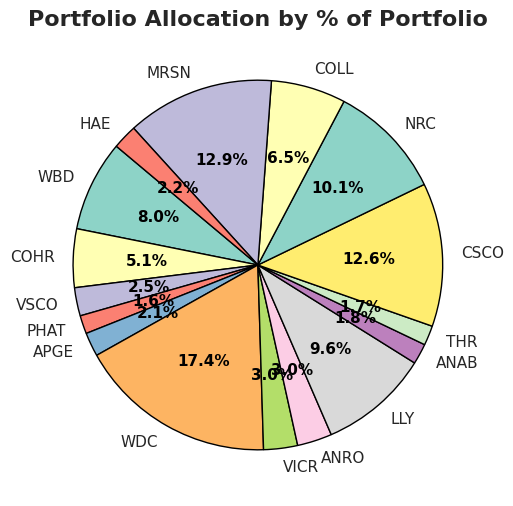

/tmp/ipython-input-3150225708.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


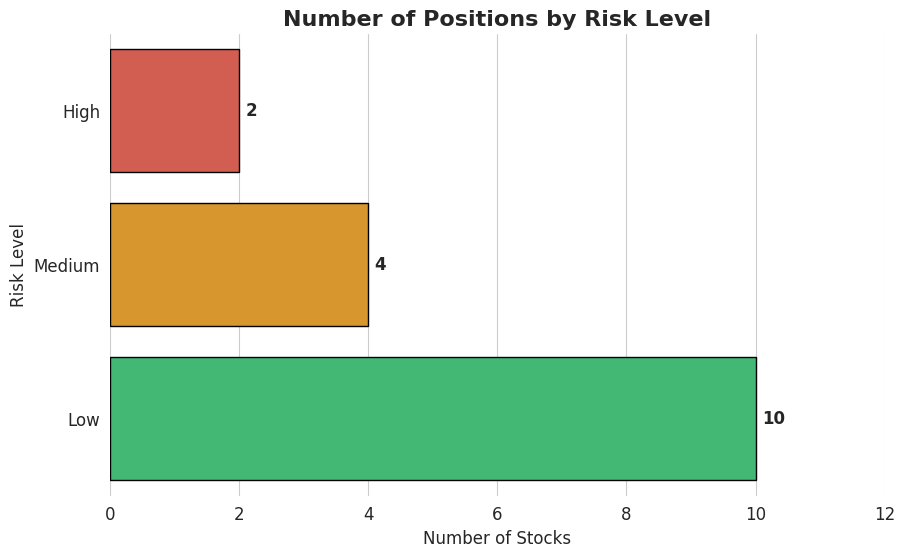

### Step 1 Screenshot

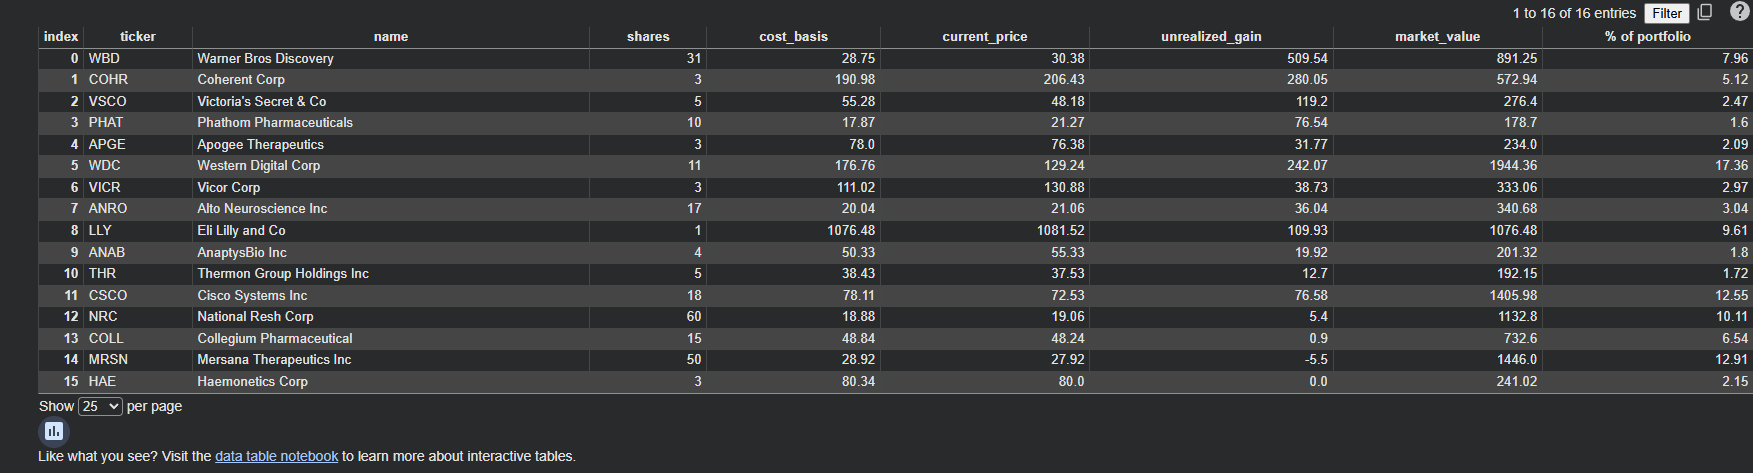

### Step 2 Screenshot

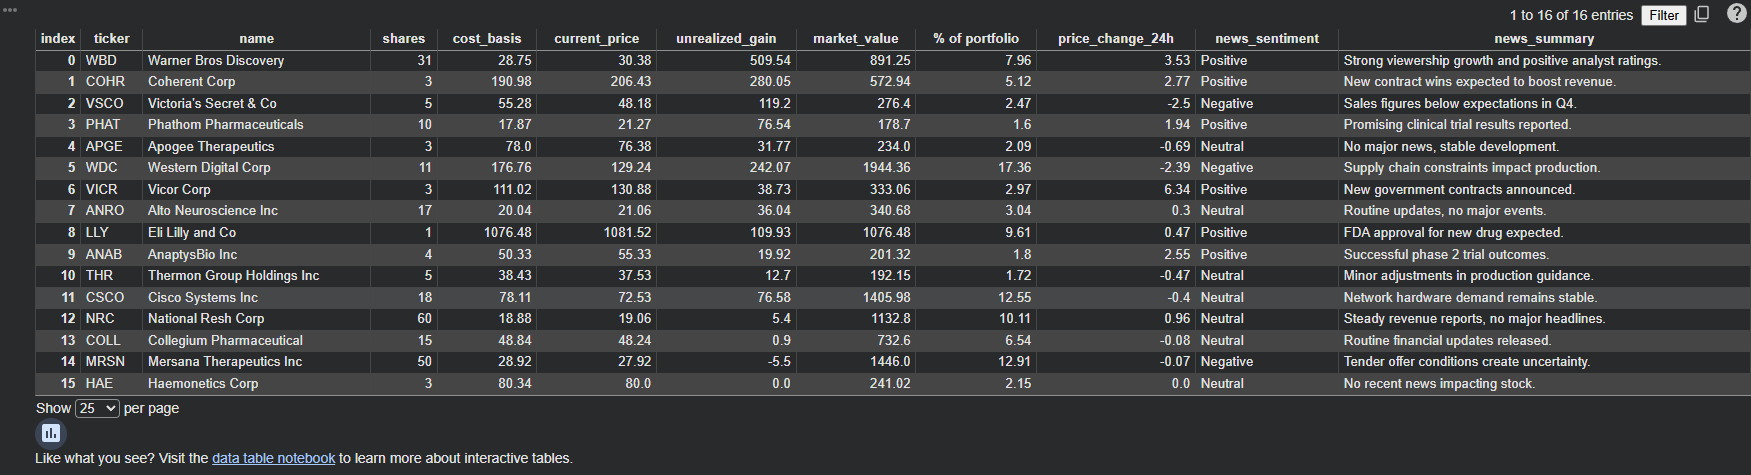

### Step 3 Screenshot

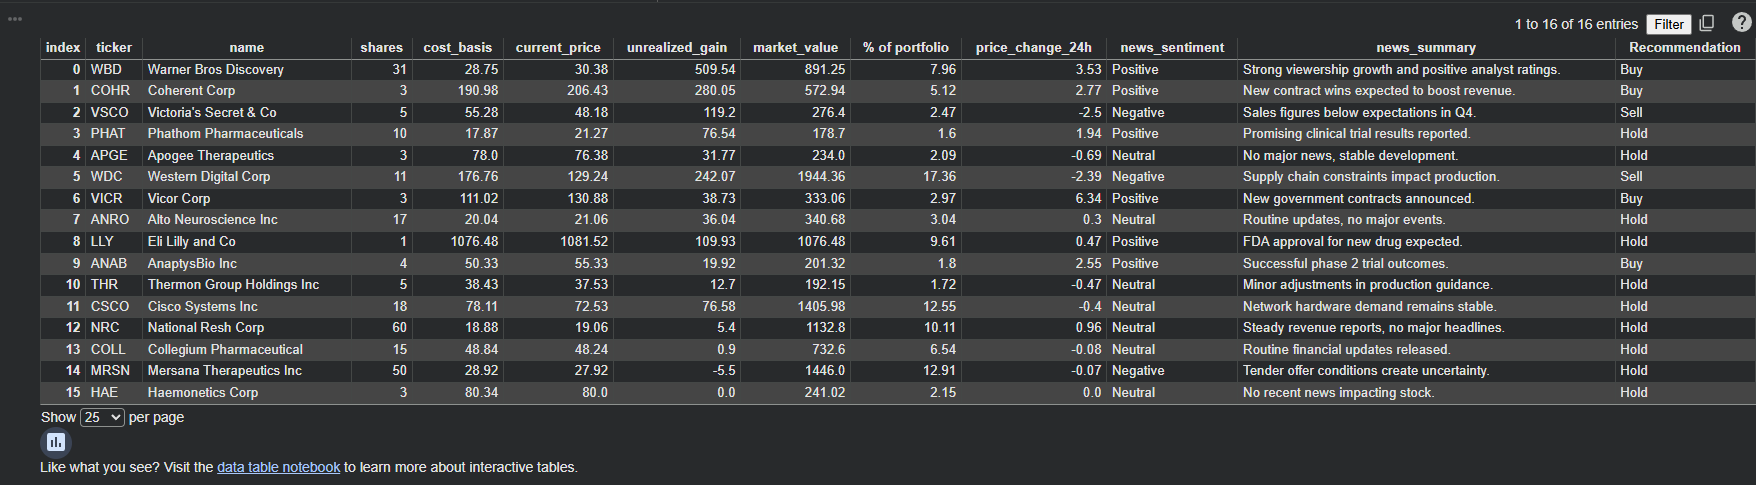

### Step 4 Screenshot

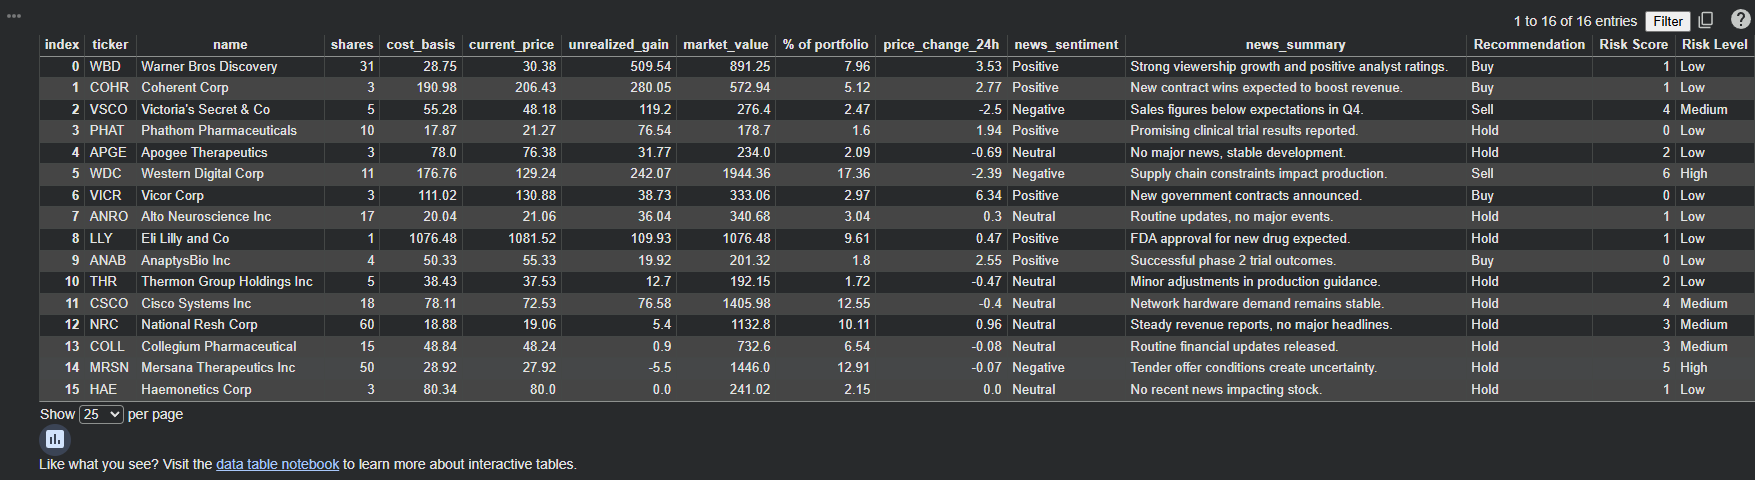

### Step 5 Screenshot

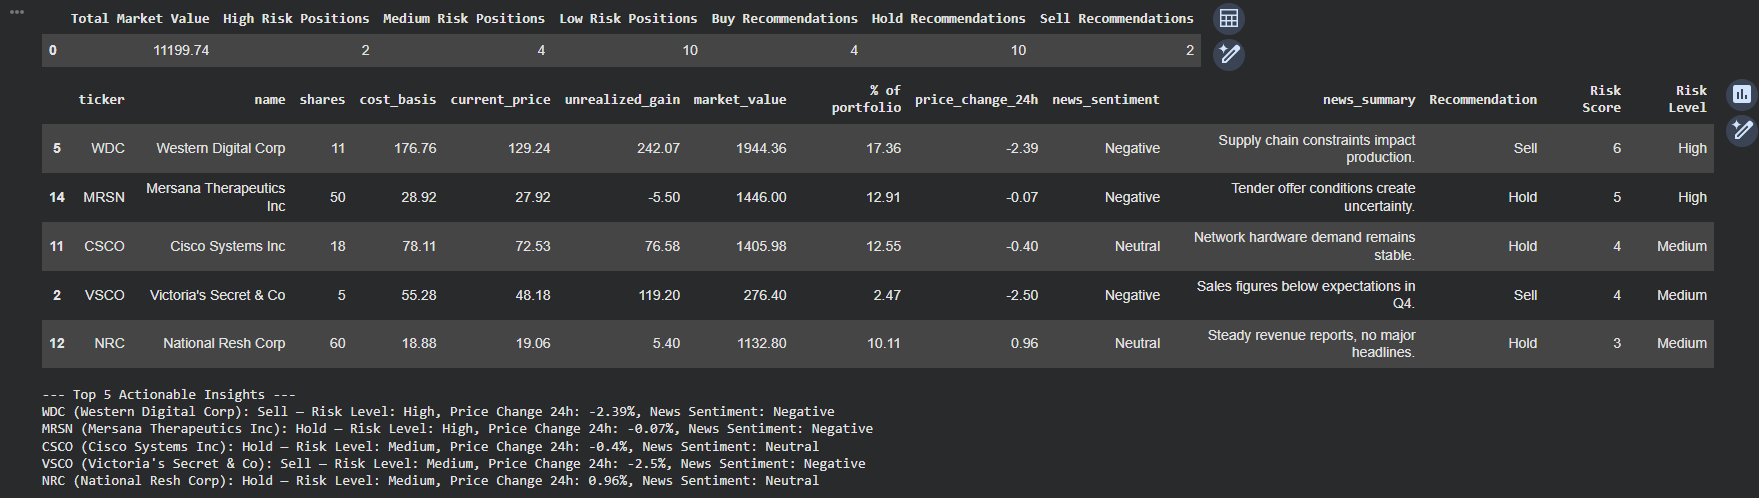

In [13]:
# --------------------------------------------------
# Step 6: Enhanced Visualizations & Inline Screenshots
# --------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, Image

# Apply a Seaborn style for modern aesthetics
sns.set_style("whitegrid")
plt.rcParams.update({"font.size": 12, "figure.dpi": 100})

# -----------------------
# Portfolio Allocation Pie Chart
# -----------------------
plt.figure(figsize=(10,6))
colors = sns.color_palette("Set3", len(portfolio_analysis_df))
wedges, texts, autotexts = plt.pie(
    portfolio_analysis_df["% of portfolio"],
    labels=portfolio_analysis_df["ticker"],
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    wedgeprops={"edgecolor": "black", "linewidth": 1},
    textprops={"fontsize": 11}
)
plt.setp(autotexts, weight="bold", color="black")
plt.title("Portfolio Allocation by % of Portfolio", fontsize=16, weight="bold")
plt.show()

# -----------------------
# Enhanced Risk Level Horizontal Bar Chart
# -----------------------
risk_counts = portfolio_analysis_df["Risk Level"].value_counts().reindex(["High", "Medium", "Low"], fill_value=0)

plt.figure(figsize=(10,6))
colors = ["#e74c3c", "#f39c12", "#2ecc71"]  # High=red, Medium=orange, Low=green

bars = sns.barplot(
    x=risk_counts.values,
    y=risk_counts.index,
    palette=colors,
    edgecolor="black"
)

# Add value labels on bars
for bar in bars.patches:
    plt.text(
        bar.get_width() + 0.1,
        bar.get_y() + bar.get_height()/2,
        f'{int(bar.get_width())}',
        va='center', fontsize=12, weight='bold'
    )

plt.title("Number of Positions by Risk Level", fontsize=16, weight="bold")
plt.xlabel("Number of Stocks")
plt.ylabel("Risk Level")
plt.xlim(0, max(risk_counts.values) + 2)
sns.despine(left=True, bottom=True)
plt.show()

# -----------------------
# Inline Screenshots
# -----------------------
steps_ordered = ["Step 1", "Step 2", "Step 3", "Step 4", "Step 5"]
screenshots_dict = {
    "Step 1": "/content/screenshots/Step 1.png",
    "Step 2": "/content/screenshots/Step 2.png",
    "Step 3": "/content/screenshots/Step 3.png",
    "Step 4": "/content/screenshots/Step 4.png",
    "Step 5": "/content/screenshots/Step 5.png",
}

for step in steps_ordered:
    path = screenshots_dict.get(step)
    display(Markdown(f"### {step} Screenshot"))
    try:
        display(Image(filename=path))
    except FileNotFoundError:
        display(Markdown(f"*Screenshot for {step} not found at {path}*"))

# --------------------------------------------------
# Step 7: Final Evaluation & Next Steps
# --------------------------------------------------

## Portfolio Summary
This notebook has provided a **multi-step analysis** of your portfolio, including:

- Stock positions with **names, symbols, shares, and % of portfolio**
- Simulated **news sentiment** affecting each position
- **Buy/Hold/Sell recommendations** based on price changes, sentiment, and portfolio weight
- **Risk assessment** with High/Medium/Low scoring
- Highlighted **top-risk positions** for actionable attention
- Professional visualizations:
  - Portfolio allocation pie chart
  - Horizontal risk-level bar chart

---

## Key Insights
- High-risk positions should be **monitored closely** or considered for adjustment
- Medium-risk positions may require **periodic review**
- Low-risk positions are currently stable relative to the portfolio

---

## Next Steps
- Update stock positions with **live market data**
- Integrate **live news sentiment or AI reasoning** for dynamic recommendations
- Extend visualizations with **trends, sector analysis, or time-series performance**
- Use this notebook as a **dashboard for portfolio monitoring or reporting**

---

## Notes
- Risk scoring and recommendations are **deterministic and reproducible**
- Visualizations provide a **clear, executive-ready snapshot** of portfolio allocation and risk
- Inline screenshots and charts document each step for clarity and reproducibility